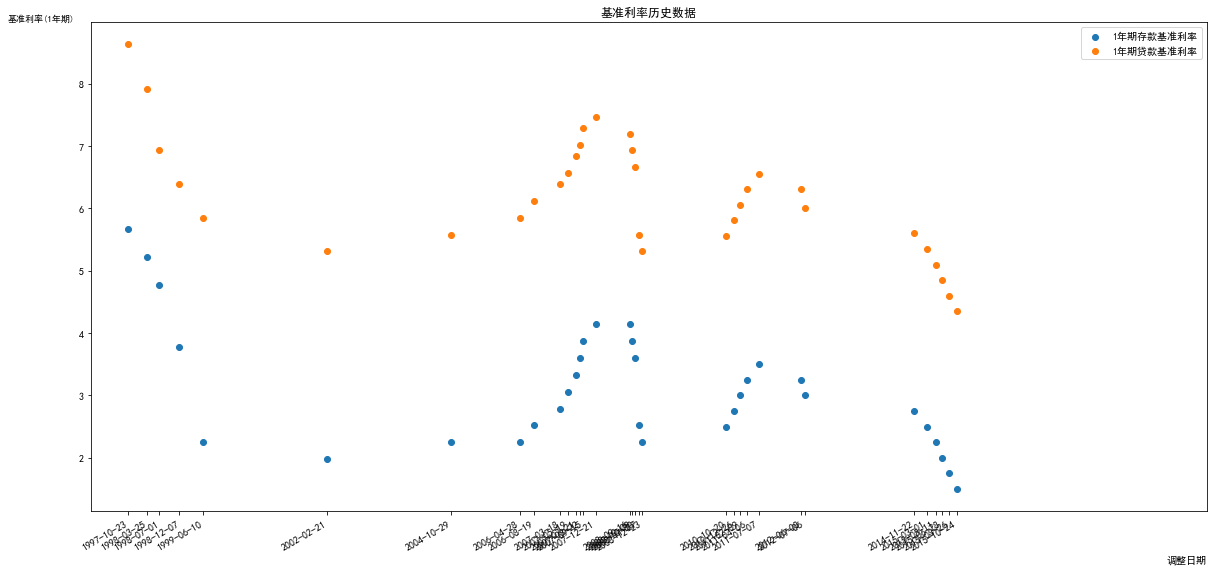

In [5]:
import requests
import json
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

plt.rcParams['font.sans-serif']=['SimHei']      
plt.rcParams['axes.unicode_minus'] = False

now = time.time()
local_time = time.localtime(now)
today = time.strftime('%Y-%m-%d', local_time)

url = "http://www.chinamoney.com.cn/ags/ms/cm-u-bk-currency/SddsIntrRatePlRatHis?\
    lang=CN&startDate=1997-01-01&endDate="+today+"&pageNum=1&pageSize=1000"

res = requests.get(url)
data = json.loads(res.text)

records = data['records']

x = []
x0 = []
yc = []
yd = []
for record in records:
    dateString = record['dateString']
    x.append(dateString)
    timeStamp = int(time.mktime(time.strptime(dateString, "%Y-%m-%d")))
    x0.append(timeStamp)
    yc.append(float(record['depositRate']))
    yd.append(float(record['loanRate']))

# print(x)
# print(x0)

fig=plt.figure(figsize=(20,10))
plt.scatter(x0[::-1], yc[::-1],label="1年期存款基准利率")
plt.scatter(x0[::-1], yd[::-1],label="1年期贷款基准利率")

startTimestamp = int(time.mktime(time.strptime('1997-01-01', "%Y-%m-%d")))
endTimestamp = int(time.mktime(time.strptime(today, "%Y-%m-%d")))
plt.xlim(startTimestamp, endTimestamp)
# ax = fig.add_subplot(1,1,1)
# ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(x0,x,rotation=90)
# ax.tick_params(axis = 'x', which = 'major', labelsize = 6)
fig.autofmt_xdate()

plt.title("基准利率历史数据")
plt.xlabel("调整日期", loc = "right")
plt.ylabel("基准利率(1年期)", loc = "top", rotation = 0, fontsize = 9)

plt.legend()

plt.show()